A simple test for running %matplotlib inline animations on mybinder.org

In [1]:
%matplotlib inline
%pylab inline
import pylab as pl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation, rc
from IPython.display import HTML

Populating the interactive namespace from numpy and matplotlib


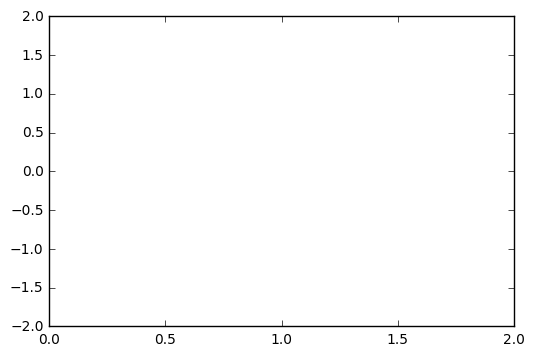

In [2]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

In [3]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

In [4]:
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

In [ ]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

In [5]:
HTML(anim.to_html5_video())

In [6]:
anim._repr_html_() is None

True

In [7]:
anim

In [8]:
matplotlib.rcParams['animation.writer'] = 'avconv'
rc('animation', html='html5')

In [9]:
anim

In [10]:
anim._repr_html_() is None

False